### Tarefas :)
<p><s>- missing values - ines  5)</s></p>
- outliers - isa     6)
- inconsistencias - ir pondo   2)
- feature selection - ines    8)  
<p><s>- tipos de variáveis - joana  1)</s></p>
<p><s>- PCA - joana    11)</s></p>
- fazer variáveis novas - ines      4) (Estou a ver o que faz sentido de variáveis novas)
- gráficos, histogramas, correlações - isa  3)
- heatmap -isa      7)
- relatório lmao - todas :D
<p><s>- scale data,</s></p>
- ordinal encoder    9)
- dummify - joana    10)
- 

<div class="alert alert-block alert-info" style = "background:#d0de6f; color:#000000; border:0;">
    
# 1. Imports
    
</div>

In [60]:
#!pip install pyreadstat

In [1]:
import numpy as np
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info" style = "background:#d0de6f; color:#000000; border:0;">
    
# 2. Load Datasets
    
</div>

In [72]:
df, meta = pyreadstat.read_sas7bdat('a2z_insurance.sas7bdat')

In [73]:
df_original = df.copy()

In [74]:
df_original.head()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [75]:
df.head()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [76]:
#Check for dupicate rows
df['CustID'].nunique()

10296

In [77]:
df.set_index('CustID', inplace = True)

<div class="alert alert-block alert-info" style = "background:#d0de6f; color:#000000; border:0;">
    
# 3. Data Exploration
    
</div>

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10296 entries, 1.0 to 10296.0
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FirstPolYear   10266 non-null  float64
 1   BirthYear      10279 non-null  float64
 2   EducDeg        10296 non-null  object 
 3   MonthSal       10260 non-null  float64
 4   GeoLivArea     10295 non-null  float64
 5   Children       10275 non-null  float64
 6   CustMonVal     10296 non-null  float64
 7   ClaimsRate     10296 non-null  float64
 8   PremMotor      10262 non-null  float64
 9   PremHousehold  10296 non-null  float64
 10  PremHealth     10253 non-null  float64
 11  PremLife       10192 non-null  float64
 12  PremWork       10210 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


From here we can see that some variables are keep as float although thats is not the most appropiate variable type for them. We are going to correct them now so we can explore the data easier. We can also see that we have a lot of variables with missing values.

In [36]:
df.isnull().sum()

FirstPolYear      30
BirthYear         17
EducDeg            0
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [37]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
FirstPolYear,10266.0,NaN,NaN,NaN,1991.062634,511.267913,1974.0,1980.0,1986.0,1992.0,53784.0
BirthYear,10279.0,NaN,NaN,NaN,1968.007783,19.709476,1028.0,1953.0,1968.0,1983.0,2001.0
EducDeg,10296,5,3 - BSc/MSc,4799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthSal,10260.0,NaN,NaN,NaN,2506.667057,1157.449634,333.0,1706.0,2501.5,3290.25,55215.0
GeoLivArea,10295.0,NaN,NaN,NaN,2.709859,1.266291,1.0,1.0,3.0,4.0,4.0
Children,10275.0,NaN,NaN,NaN,0.706764,0.455268,0.0,0.0,1.0,1.0,1.0
CustMonVal,10296.0,NaN,NaN,NaN,177.892605,1945.811505,-165680.42,-9.44,186.87,399.7775,11875.89
ClaimsRate,10296.0,NaN,NaN,NaN,0.742772,2.916964,0.0,0.39,0.72,0.98,256.2
PremMotor,10262.0,NaN,NaN,NaN,300.470252,211.914997,-4.11,190.59,298.61,408.3,11604.42
PremHousehold,10296.0,NaN,NaN,NaN,210.431192,352.595984,-75.0,49.45,132.8,290.05,25048.8


### Changing Data Types

The variables <code>BirthYear</code>, <code>FirstPolYear</code>, <code>GeoLivArea</code> and <code>Children</code> are discrete, so they should be integers.

In [11]:
df[(round(df['BirthYear']) != df['BirthYear'])]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
420.0,1987.0,NaN,2 - High School,3219.0,1.0,1.0,379.30,0.33,404.52,42.80,152.25,7.78,-0.11
756.0,NaN,NaN,4 - PhD,2913.0,3.0,0.0,430.20,0.28,465.20,59.45,94.13,4.89,10.00
1874.0,1995.0,NaN,1 - Basic,517.0,1.0,1.0,-238.93,1.19,63.68,692.90,98.13,151.14,126.47
1929.0,1983.0,NaN,2 - High School,2426.0,4.0,1.0,163.80,0.74,286.83,158.35,181.48,72.57,30.45
2562.0,1976.0,NaN,2 - High School,3253.0,1.0,1.0,-44.44,1.03,298.61,13.90,191.37,49.01,33.34
2706.0,1978.0,NaN,3 - BSc/MSc,3614.0,4.0,0.0,356.96,0.54,381.96,274.50,117.91,35.45,12.89
3182.0,1987.0,NaN,2 - High School,3954.0,2.0,0.0,-25.00,1.00,233.60,206.70,265.94,36.45,21.67
3284.0,1983.0,NaN,3 - BSc/MSc,2433.0,1.0,1.0,289.06,0.52,321.84,83.90,238.60,3.89,3.89
3761.0,NaN,NaN,2 - High School,2067.0,1.0,1.0,-47.67,1.04,495.87,58.90,61.90,22.67,3.78


In [12]:
df['BirthYear'] = df['BirthYear'].astype('Int32')
df['BirthYear'].dtype

Int32Dtype()

In [13]:
df[(round(df['FirstPolYear']) != df['FirstPolYear'])]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
297.0,NaN,1955,4 - PhD,3591.0,NaN,NaN,-49.11,1.04,447.64,-25.00,130.58,0.89,12.89
756.0,NaN,<NA>,4 - PhD,2913.0,3.0,0.0,430.20,0.28,465.20,59.45,94.13,4.89,10.00
897.0,NaN,1960,,2643.0,1.0,1.0,-25.00,1.00,515.54,33.90,47.01,12.89,3.78
2228.0,NaN,1979,3 - BSc/MSc,1987.0,2.0,NaN,429.87,0.25,376.85,33.90,154.25,39.34,4.78
2450.0,NaN,1939,,4465.0,4.0,0.0,457.75,0.36,338.73,187.25,175.81,43.23,4.78
2704.0,NaN,1977,1 - Basic,2105.0,2.0,NaN,302.62,0.54,299.28,167.25,162.92,28.34,51.01
2729.0,NaN,1954,,3200.0,2.0,0.0,109.25,0.77,211.93,14.45,275.72,77.68,11.67
2771.0,NaN,1984,,1473.0,4.0,1.0,443.74,0.31,386.74,104.45,156.92,5.00,27.45
2927.0,NaN,1982,3 - BSc/MSc,1817.0,2.0,NaN,420.32,0.26,466.42,-10.55,112.91,12.89,16.89


In [14]:
df['FirstPolYear'] = df['FirstPolYear'].astype('Int32')
df['FirstPolYear'].dtype

Int32Dtype()

In [15]:
df[(round(df['GeoLivArea']) != df['GeoLivArea'])]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
297.0,<NA>,1955,4 - PhD,3591.0,NaN,NaN,-49.11,1.04,447.64,-25.0,130.58,0.89,12.89


In [16]:
df['GeoLivArea'] = df['GeoLivArea'].astype('Int32')
df['GeoLivArea'].dtype

Int32Dtype()

In [44]:
df[(round(df['Children']) != df['Children'])]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
297.0,NaN,1955.0,4 - PhD,3591.0,NaN,NaN,-49.11,1.04,447.64,-25.00,130.58,0.89,12.89
620.0,1980.0,1994.0,3 - BSc/MSc,1333.0,2.0,NaN,312.52,0.40,286.83,-6.10,175.70,52.90,56.79
773.0,1998.0,1949.0,2 - High School,3601.0,2.0,NaN,27.01,0.94,104.91,308.95,285.61,64.90,52.90
2228.0,NaN,1979.0,3 - BSc/MSc,1987.0,2.0,NaN,429.87,0.25,376.85,33.90,154.25,39.34,4.78
2363.0,1981.0,1975.0,2 - High School,1607.0,2.0,NaN,271.51,0.64,292.61,308.40,159.14,11.89,59.68
2672.0,1992.0,1988.0,2 - High School,1140.0,2.0,NaN,356.40,0.54,168.03,265.60,273.94,68.79,52.23
2704.0,NaN,1977.0,1 - Basic,2105.0,2.0,NaN,302.62,0.54,299.28,167.25,162.92,28.34,51.01
2927.0,NaN,1982.0,3 - BSc/MSc,1817.0,2.0,NaN,420.32,0.26,466.42,-10.55,112.91,12.89,16.89
3178.0,1980.0,1975.0,3 - BSc/MSc,2647.0,2.0,NaN,392.19,0.37,404.41,107.25,110.80,24.56,12.78


In [18]:
df['Children'] = df['Children'].astype('Int32')
df['Children'].dtype

Int32Dtype()

### Continuing with data exploration

In [19]:
df.describe()

,FirstPolYear,BirthYear,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
count,10266.000000,10279.000000,10260.000000,10295.000000,10275.000000,10296.000000,10296.000000,10262.000000,10296.000000,10253.000000,10192.000000,10210.000000
mean,1991.062634,1968.007783,2506.667057,2.709859,0.706764,177.892605,0.742772,300.470252,210.431192,171.580833,41.855782,41.277514
std,511.267913,19.709476,1157.449634,1.266291,0.455268,1945.811505,2.916964,211.914997,352.595984,296.405976,47.480632,51.513572
min,1974.000000,1028.000000,333.000000,1.000000,0.000000,-165680.420000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000
25%,1980.000000,1953.000000,1706.000000,1.000000,0.000000,-9.440000,0.390000,190.590000,49.450000,111.800000,9.890000,10.670000
50%,1986.000000,1968.000000,2501.500000,3.000000,1.000000,186.870000,0.720000,298.610000,132.800000,162.810000,25.560000,25.670000
75%,1992.000000,1983.000000,3290.250000,4.000000,1.000000,399.777500,0.980000,408.300000,290.050000,219.820000,57.790000,56.790000
max,53784.000000,2001.000000,55215.000000,4.000000,1.000000,11875.890000,256.200000,11604.420000,25048.800000,28272.000000,398.300000,1988.700000


In [21]:
df.head()

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
1.0,1985,1982,2 - High School,2177.0,1,1,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2.0,1981,1995,2 - High School,677.0,4,1,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3.0,1991,1970,1 - Basic,2277.0,3,0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4.0,1990,1981,3 - BSc/MSc,1099.0,4,1,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5.0,1986,1973,3 - BSc/MSc,1763.0,4,1,35.23,0.90,338.62,47.80,182.59,18.78,41.45


The variable <code>BirthYear</code> has an impossible minimum value. The variable <code>FirstPolYear</code> also has a impossible maximum value. 

In [14]:
df.describe(include="O").T

,count,unique,top,freq
EducDeg,10296,5,3 - BSc/MSc,4799


### Check inconsistencies

In [11]:
df['BirthYear'].sort_values(ascending=True).head() #temos este 1028 que n faz sentido nenhum

7195    1028.0
7440    1935.0
7956    1935.0
329     1935.0
3454    1935.0
Name: BirthYear, dtype: float64

We only have one value that does not make sense: 1028. Now we want to see if there are people that have their FirstPolYear before the BirthYear

In [22]:
df[df['FirstPolYear'] <= df['BirthYear']]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
2.0,1981,1995,2 - High School,677.0,4,1,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
14.0,1983,2000,1 - Basic,1043.0,3,1,-75.12,1.06,44.34,342.85,127.69,267.94,94.46
19.0,1981,1982,1 - Basic,1414.0,3,1,230.38,0.71,313.17,373.40,121.80,14.78,72.57
21.0,1986,1986,4 - PhD,1704.0,4,1,373.73,0.39,329.84,65.00,221.93,3.89,33.34
23.0,1976,1986,2 - High School,1495.0,1,1,-89.79,1.08,209.04,308.95,192.48,64.79,54.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10269.0,1987,1988,3 - BSc/MSc,1414.0,3,1,50.46,0.90,129.58,167.80,184.48,165.92,75.46
10274.0,1989,1992,2 - High School,1035.0,1,1,293.51,0.58,235.71,195.60,103.13,170.92,58.12
10285.0,1980,1987,3 - BSc/MSc,1504.0,4,1,-1.55,0.96,390.63,29.45,179.70,-6.00,NaN


There are 2160 people that have policies that were done before they were even born.

In [23]:
df[(df['BirthYear'] >2000) & (df['PremHousehold']>0)]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
660.0,1991,2001,1 - Basic,1284.0,4,1,243.50,0.81,46.23,1079.65,72.68,252.27,-10.00
690.0,1997,2001,1 - Basic,1180.0,3,1,436.10,0.48,54.90,406.20,65.79,112.02,256.05
866.0,1979,2001,1 - Basic,562.0,1,1,1113.78,0.11,40.34,847.95,94.24,178.70,112.13
1437.0,1989,2001,1 - Basic,823.0,4,0,281.28,0.60,129.58,177.80,58.01,176.70,218.15
2580.0,1986,2001,1 - Basic,1006.0,4,0,267.95,0.67,48.23,396.75,291.50,127.58,24.45
3147.0,1994,2001,1 - Basic,372.0,4,1,488.76,0.36,60.68,270.60,177.59,182.48,107.13
4466.0,1978,2001,1 - Basic,958.0,4,0,-204.59,1.11,28.56,1359.15,68.79,38.23,179.59
4484.0,1983,2001,1 - Basic,1241.0,3,1,909.17,0.13,43.34,589.55,142.47,121.80,179.48
5348.0,1980,2001,1 - Basic,1119.0,3,1,796.71,0.23,148.14,628.45,221.82,45.12,30.23


### Value Counts

In [24]:
for col in df.columns:
    if df[col].dtype!="float64":
        print('-' * 40 + col + '-' * 40 , end=' - ')
        display(df[col].value_counts(dropna=False))

----------------------------------------FirstPolYear---------------------------------------- - 

1988     512
1994     475
1993     473
1989     466
1984     464
1986     458
1977     453
1978     453
1992     451
1990     449
1981     445
1995     445
1982     444
1979     443
1996     440
1987     438
1976     433
1980     432
1991     430
1985     429
1983     423
1975     285
1997     271
1974     141
1998     112
<NA>      30
53784      1
Name: FirstPolYear, dtype: Int64

----------------------------------------BirthYear---------------------------------------- - 

1962    206
1968    200
1964    194
1953    193
1981    190
       ... 
2000     35
<NA>     17
1935     14
2001     12
1028      1
Name: BirthYear, Length: 69, dtype: Int64

----------------------------------------EducDeg---------------------------------------- - 

3 - BSc/MSc        4799
2 - High School    3510
1 - Basic          1272
4 - PhD             698
                     17
Name: EducDeg, dtype: int64

----------------------------------------GeoLivArea---------------------------------------- - 

4       4145
1       3048
3       2066
2       1036
<NA>       1
Name: GeoLivArea, dtype: Int64

----------------------------------------Children---------------------------------------- - 

1       7262
0       3013
<NA>      21
Name: Children, dtype: Int64

<p>The variable <code>FirstPolYear</code> has one person with the impossible value of 53784.</p>
<p>The variable <code>BirthYear</code> has one person with the impossible value of 1028.</p>
<p>The variable <code>EducDeg</code> has 17 missing values that are cells that are completly blank.</p>


### Distribuition Graphs

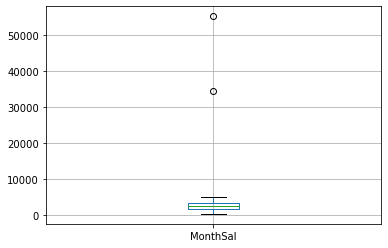

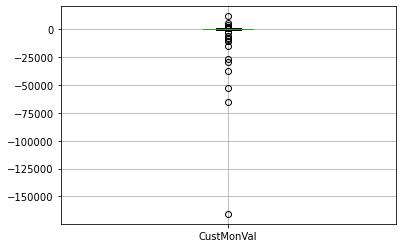

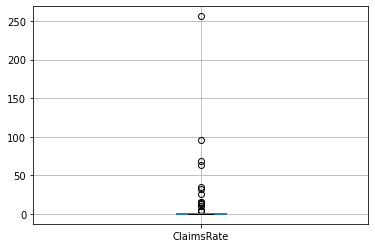

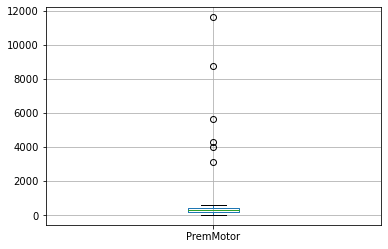

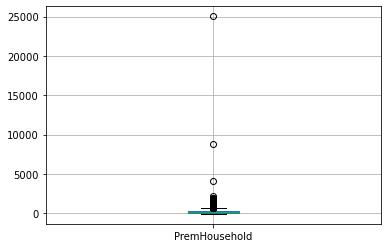

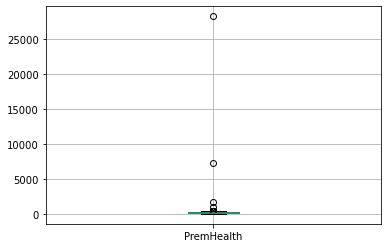

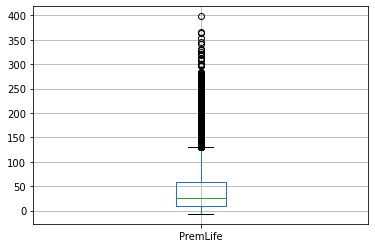

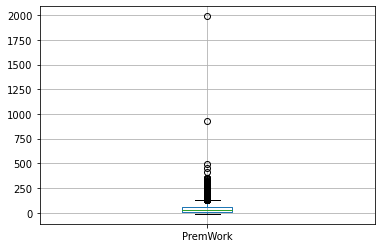

In [96]:
for col in df.columns:
    if df[col].dtype=="float64":
        fig=plt.figure()
        df.boxplot(col)

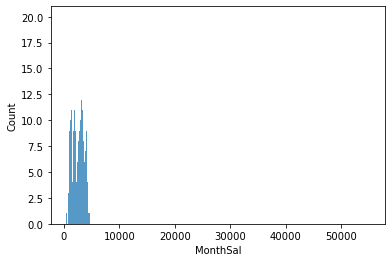

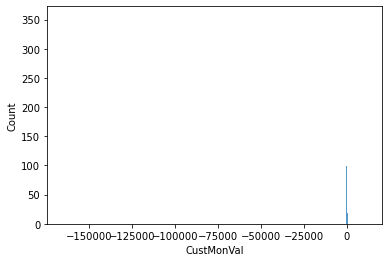

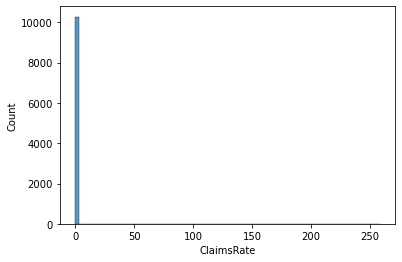

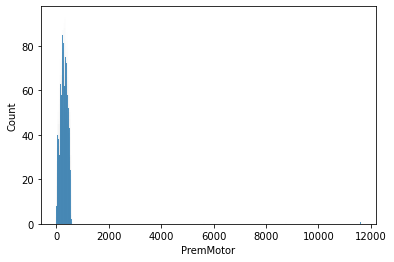

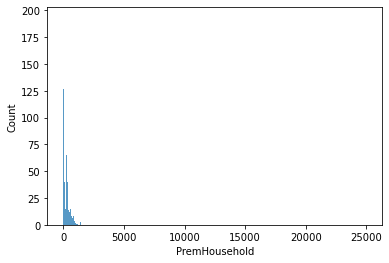

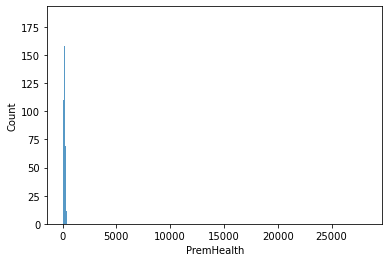

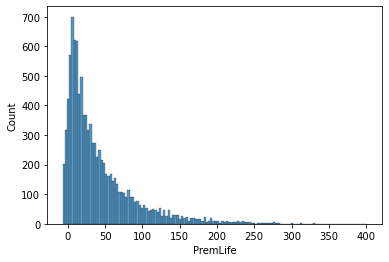

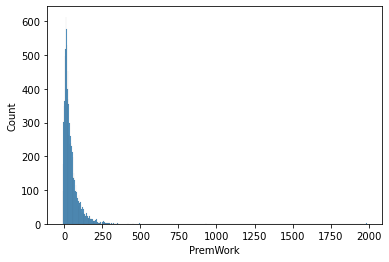

In [99]:
for col in df.columns:
    if df[col].dtype=="float64":
        fig=plt.figure()
        sns.histplot(data=df, x=col, binwidth=3)

<div class="alert alert-block alert-info" style = "background:#d0de6f; color:#000000; border:0;">
    
# 4. Data Cleaning
    
</div>

In [25]:
#making the blank spaces in education a nan
df.replace("", np.nan, inplace=True) 

In [26]:
df['EducDeg'].value_counts(dropna=False)

3 - BSc/MSc        4799
2 - High School    3510
1 - Basic          1272
4 - PhD             698
NaN                  17
Name: EducDeg, dtype: int64

### Separating Numerical Variables from Categorical/Binary

In [97]:
# Define metric and non-metric features
categorical_features = ["EducDeg"]
metric_features = df.columns.drop(categorical_features).to_list()

In [105]:
metric_features

['FirstPolYear',
 'BirthYear',
 'MonthSal',
 'GeoLivArea',
 'Children',
 'CustMonVal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork',
 'EducDeg']

In [80]:
#Education Degree is our only categorical feature
df[categorical_features].head()

,EducDeg
CustID,
1.0,2 - High School
2.0,2 - High School
3.0,1 - Basic
4.0,3 - BSc/MSc
5.0,3 - BSc/MSc


In [81]:
#we find the mode for EducDeg
mode = df[categorical_features].mode().loc[0]
mode

EducDeg    3 - BSc/MSc
Name: 0, dtype: object

In [93]:
#We impute the missing values with the mode
df.fillna(mode, inplace=True)
df.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg            0
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [92]:
#Converting EducDeg into a numeric feature
df['EducDeg'].replace(['1 - Basic', '2 - High School','3 - BSc/MSc','4 - PhD'],
                        [1,2,3,4],inplace=True)        

In [104]:
#Appending EducDeg to the metric features
metric_features.append('EducDeg')

In [107]:
df[metric_features].head() #now with education degree 

,FirstPolYear,BirthYear,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,EducDeg
CustID,,,,,,,,,,,,,
1.0,1985.0,1982.0,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,2
2.0,1981.0,1995.0,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,2
3.0,1991.0,1970.0,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,1
4.0,1990.0,1981.0,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,3
5.0,1986.0,1973.0,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,3


In [109]:
#Beacuse we have some degree of outliers we choose to impute the missing values with the median value
#instead of the mean
df[metric_features].median(numeric_only=True)

FirstPolYear     1986.00
BirthYear        1968.00
MonthSal         2501.50
GeoLivArea          3.00
Children            1.00
CustMonVal        186.87
ClaimsRate          0.72
PremMotor         298.61
PremHousehold     132.80
PremHealth        162.81
PremLife           25.56
PremWork           25.67
dtype: float64

In [112]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.isna().sum()

FirstPolYear     0
BirthYear        0
EducDeg          0
MonthSal         0
GeoLivArea       0
Children         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
dtype: int64

In [27]:
#df_num = df.select_dtypes('float64')
#df_cat = df.select_dtypes(exclude='float64')

In [28]:
#df_num.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10296 entries, 1.0 to 10296.0
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MonthSal       10260 non-null  float64
 1   CustMonVal     10296 non-null  float64
 2   ClaimsRate     10296 non-null  float64
 3   PremMotor      10262 non-null  float64
 4   PremHousehold  10296 non-null  float64
 5   PremHealth     10253 non-null  float64
 6   PremLife       10192 non-null  float64
 7   PremWork       10210 non-null  float64
dtypes: float64(8)
memory usage: 723.9 KB


### Scaling of Data

In [108]:
scaler = MinMaxScaler().fit(df[['BirthYear','FirstPolYear','MonthSal','CustMonVal','ClaimsRate','PremHousehold','PremHealth','PremLife','PremWork','PremMotor']])
# this will return an array
df[['BirthYear','FirstPolYear','MonthSal','CustMonVal','ClaimsRate','PremHousehold','PremHealth','PremLife','PremWork','PremMotor']] = scaler.transform(df[['BirthYear','FirstPolYear','MonthSal','CustMonVal','ClaimsRate','PremHousehold','PremHealth','PremLife','PremWork','PremMotor']])
df.head()

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
1.0,0.000212,0.980473,2 - High School,0.033599,1,1,0.935260,0.001522,0.032731,0.006148,0.005251,0.133259,0.014440
2.0,0.000135,0.993834,2 - High School,0.006268,4,1,0.932376,0.004372,0.007027,0.019551,0.004202,0.497113,0.059044
3.0,0.000328,0.968140,1 - Basic,0.035421,3,0,0.935957,0.001093,0.018113,0.011921,0.004481,0.230323,0.055491
4.0,0.000309,0.979445,3 - BSc/MSc,0.013957,4,1,0.933019,0.003864,0.016074,0.004711,0.011080,0.104466,0.020163
5.0,0.000232,0.971223,3 - BSc/MSc,0.026056,4,1,0.933313,0.003513,0.029524,0.004888,0.006532,0.063607,0.026716


### PCA (need to work the missing first!)

In [ ]:
pca = PCA()
pc = pca.fit_transform(df_num)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=10)
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
print(pca.explained_variance_ratio_.cumsum())

In [ ]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(df_num.columns) + 1)],
    index=df_num.columns
)

#choosing 3 principal components
loadings.iloc[:,:3]